In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import time
import numpy as np
import Calculation.humiditycalculation as humidcalc
import Calculation.trend_func as trends
import Calculation.save_detrend_deseason as sdd

output_dtype = float
timestart = "1900-01-01"
timeend = "2010-12-31"
location = "europe_full"
# rolling_window = 4*365

file not complete
 => calc swbgt and create new file
calculate and save data
load temp took 1.45s
load dew took 1.15s
-------
input data
 Frozen(SortedKeysDict({'longitude': 320, 'latitude': 161, 'time': 162168}))
-------
sliced data
 Frozen(SortedKeysDict({'longitude': 43, 'latitude': 39, 'time': 162168}))
-------\chunks used along time:30

<xarray.Dataset>
Dimensions:    (latitude: 39, longitude: 43, time: 162168)
Coordinates:
  * longitude  (longitude) float32 0.0 1.125 2.25 3.375 ... 45.0 46.125 47.25
  * latitude   (latitude) float32 74.25 73.125 72.0 70.875 ... 33.75 32.625 31.5
  * time       (time) datetime64[ns] 1900-01-01 ... 2010-12-31T18:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(5405, 39, 43), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(5405, 39, 43), meta=np.ndarray>
------ 
calculated swbgt
no quantile
no deseason
no detrend
Filename: /home/nniebaum/bachlor-thesis-code/Scrip

EAST OK? 


calculated east side
file not complete
 => calc swbgt and create new file
calculate and save data
load temp took 1.04s
load dew took 1.04s
-------
input data
 Frozen(SortedKeysDict({'longitude': 320, 'latitude': 161, 'time': 162168}))
-------
sliced data
 Frozen(SortedKeysDict({'longitude': 13, 'latitude': 39, 'time': 162168}))
-------\chunks used along time:30

<xarray.Dataset>
Dimensions:    (latitude: 39, longitude: 13, time: 162168)
Coordinates:
  * longitude  (longitude) float32 345.375 346.5 347.625 ... 357.75 358.875
  * latitude   (latitude) float32 74.25 73.125 72.0 70.875 ... 33.75 32.625 31.5
  * time       (time) datetime64[ns] 1900-01-01 ... 2010-12-31T18:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(5405, 39, 13), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(5405, 39, 13), meta=np.ndarray>
------ 
calculated swbgt
no quantile
no deseason
no detrend
Filename: /home/nniebaum/bachlo

WEST OK? 


/home/nniebaum/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/nniebaum/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.arr

DATA ALL Frozen(SortedKeysDict({'longitude': 56, 'latitude': 39, 'time': 162168}))
all saved 108.17s
Filename: /home/nniebaum/bachlor-thesis-code/Scripts/Calculation/save_detrend_deseason.py

Line #    Mem usage    Increment   Line Contents
    12    178.2 MiB    178.2 MiB   @profile
    13                             def save_calc_swbgt(save_dict, load_dict, save = True) :
    14                             
    15    178.2 MiB      0.0 MiB           timeslice = load_dict["time_slice"]
    16    178.2 MiB      0.0 MiB           latitude_slice = load_dict["latitude_slice"]
    17    178.2 MiB      0.0 MiB           longitude_slice = load_dict["longitude_slice"]
    18                             
    19   1105.4 MiB      0.0 MiB           @profile
    20    178.2 MiB      0.0 MiB           def __main__(save = True):
    21   1105.4 MiB      0.0 MiB                   try : # if file exists load the data
    22   1105.4 MiB      4.6 MiB                           data = load_DataSet_and_a

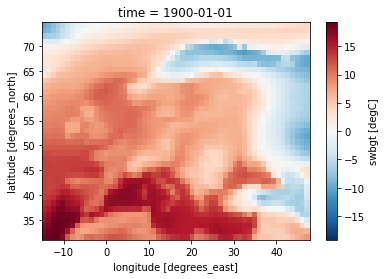

In [2]:
load_dict = {
        't2m_path' : '/data/user/jkjellsson/era-20c/t2m/t2m_era20c_1900-2010.nc',
        'd2m_path' : '/data/user/jkjellsson/era-20c/td2m/td2m_era20c_1900-2010.nc',
        'time_slice' : slice(timestart, timeend),
        "latitude_slice" : slice(75.0, 31.0),
        "longitude_slice" : slice(-15, 48),
        }

save_dict = {
        "savefolder" : '~/data_nils/',
        "location" : location,
        "savename" : location + "_{}_{}.nc".format(timestart, timeend), # old: "savename" : r"swbgt" + "_{}_{}_{}.nc".format(location, timestart, timeend),
        "rechunked" : 30,
        "quantiles" : False, #{"variables" : ["t2m"] , "quantiles" : np.array([0.98])} ,
        "deseason" : False, #{"variables" : ["t2m"] , "groupby" : "week"}, #"week",
        "detrend" : False, #{"variables" : ["t2m_deseason"]}, #False,
        "daily" : False #  please check this later !!! in the extern function
        }
st = time.time()
data = sdd.save_calc_swbgt(save_dict= save_dict, load_dict = load_dict)
print(data)
print('took:{:.0f} s'.format(time.time() - st))

# data = xr.open_dataset(save_dict["savefolder"] + save_dict["savename"])
# print(data)

data.swbgt.isel(time=0).plot()
plt.show()

# very inefficent
# data_west = xr.open_dataset(r"C:\Users\Nils Niebaum\Documents\Uni\Bachlor_thesis\Prog\Data\europe_west_1900-01-01_1930-12-31.nc")
# data_east = xr.open_dataset(r"C:\Users\Nils Niebaum\Documents\Uni\Bachlor_thesis\Prog\Data\europe_1900-01-01_1930-12-31.nc")
# print("loaded")
# st = time.time()
# xr.merge([data_west,data_east]).to_netcdf(r"C:\Users\Nils Niebaum\Documents\Uni\Bachlor_thesis\Prog\Data\europe_all_1900-01-01_1930-12-31.nc")
# print("done {:.2f} s".format(time.time() - st))

In [10]:
data.t2m.max().values

array(51.921112, dtype=float32)